## 1. 环境设置

In [1]:
import sys
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 项目根目录
project_root = Path.cwd().parent if Path.cwd().name == 'notebooks' else Path.cwd()
print(f"项目根目录: {project_root}")

项目根目录: c:\Users\Quenton\Documents\Github\writtingOCR


## 2. 加载测试图片

图片尺寸: 2170 x 2900
图片类型: uint8


C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2545658248.py:17: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2545658248.py:17: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Quenton\Documents\Github\writtingOCR\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Quenton\Documents\Github\writtingOCR\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


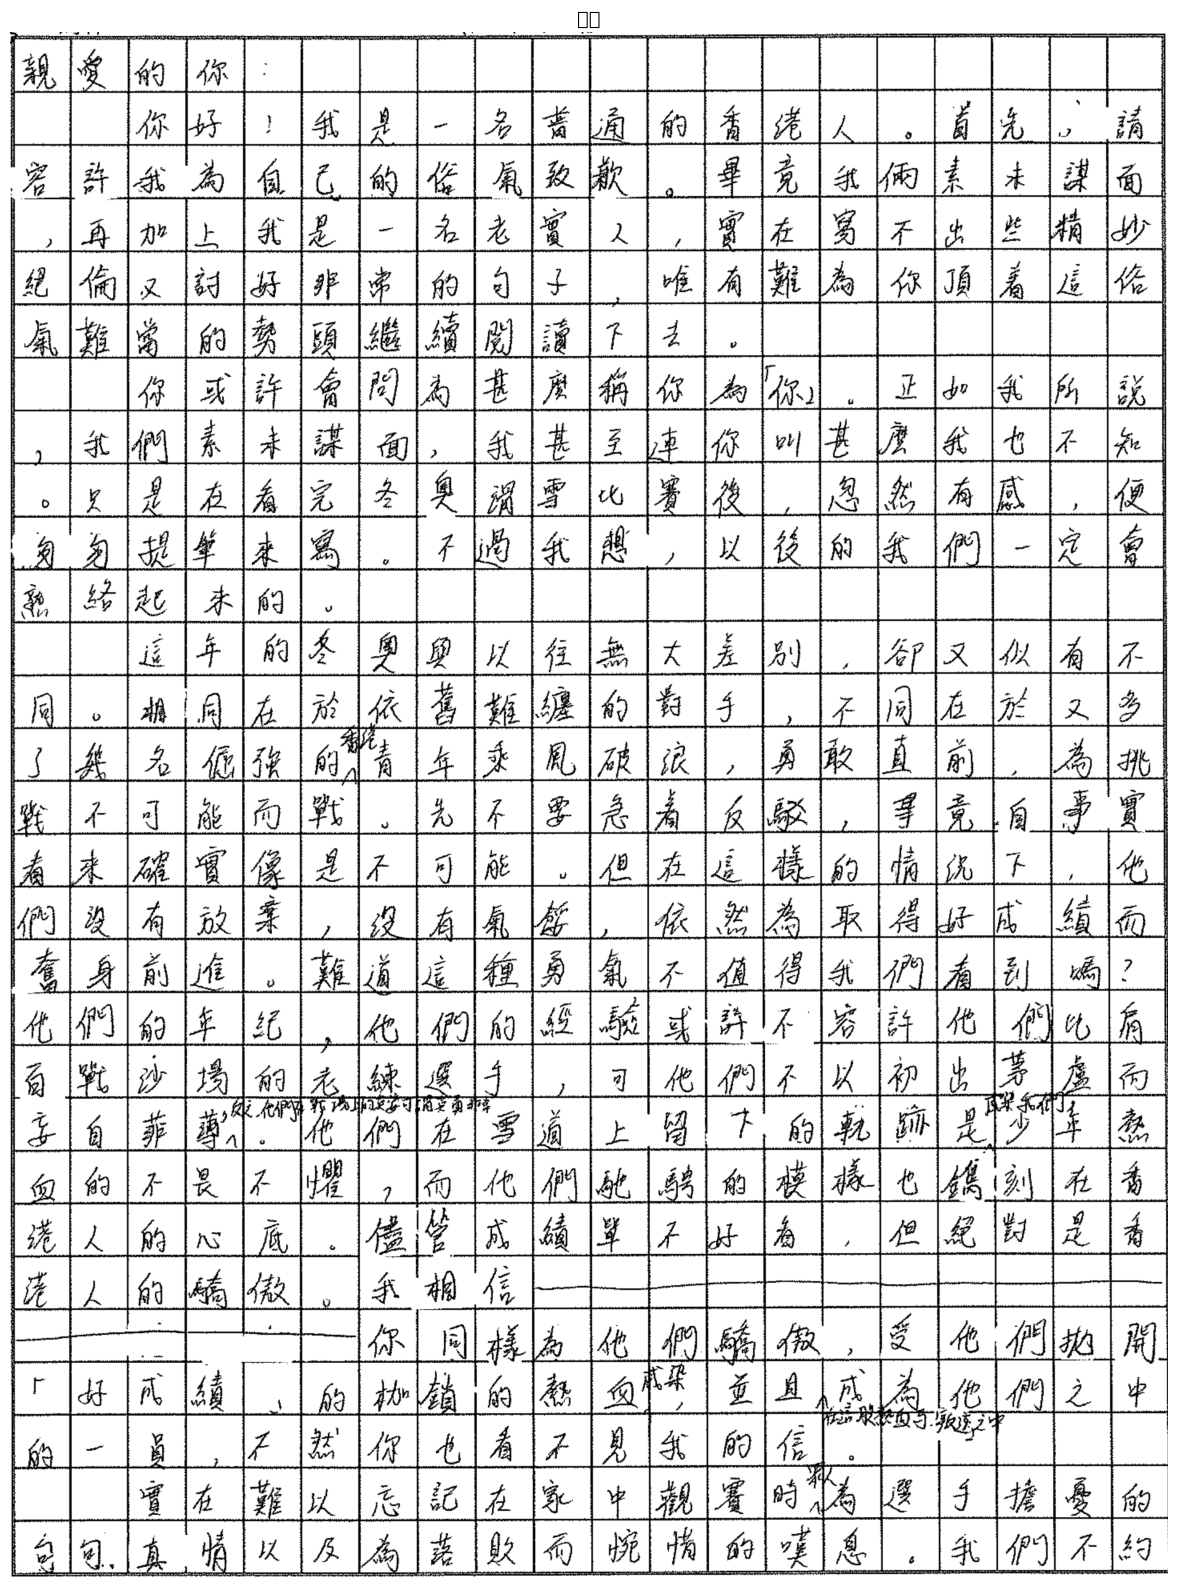

In [2]:
# 加载裁剪后的测试图片
test_img_path = project_root / 'output' / 'temp_cropped.png'

# 读取图片
img = cv2.imread(str(test_img_path))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print(f"图片尺寸: {img.shape[1]} x {img.shape[0]}")
print(f"图片类型: {img.dtype}")

# 显示原图
plt.figure(figsize=(12, 16))
plt.imshow(img_rgb)
plt.title('原图', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

## 3. 边缘检测

C:\Users\Quenton\AppData\Local\Temp\ipykernel_18120\330357983.py:9: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_18120\330357983.py:9: UserWarning: Glyph 32536 (\N{CJK UNIFIED IDEOGRAPH-7F18}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_18120\330357983.py:9: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_18120\330357983.py:9: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_18120\330357983.py:9: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_18120\330357983.py:9: UserWarning: Glyph 26524 (\

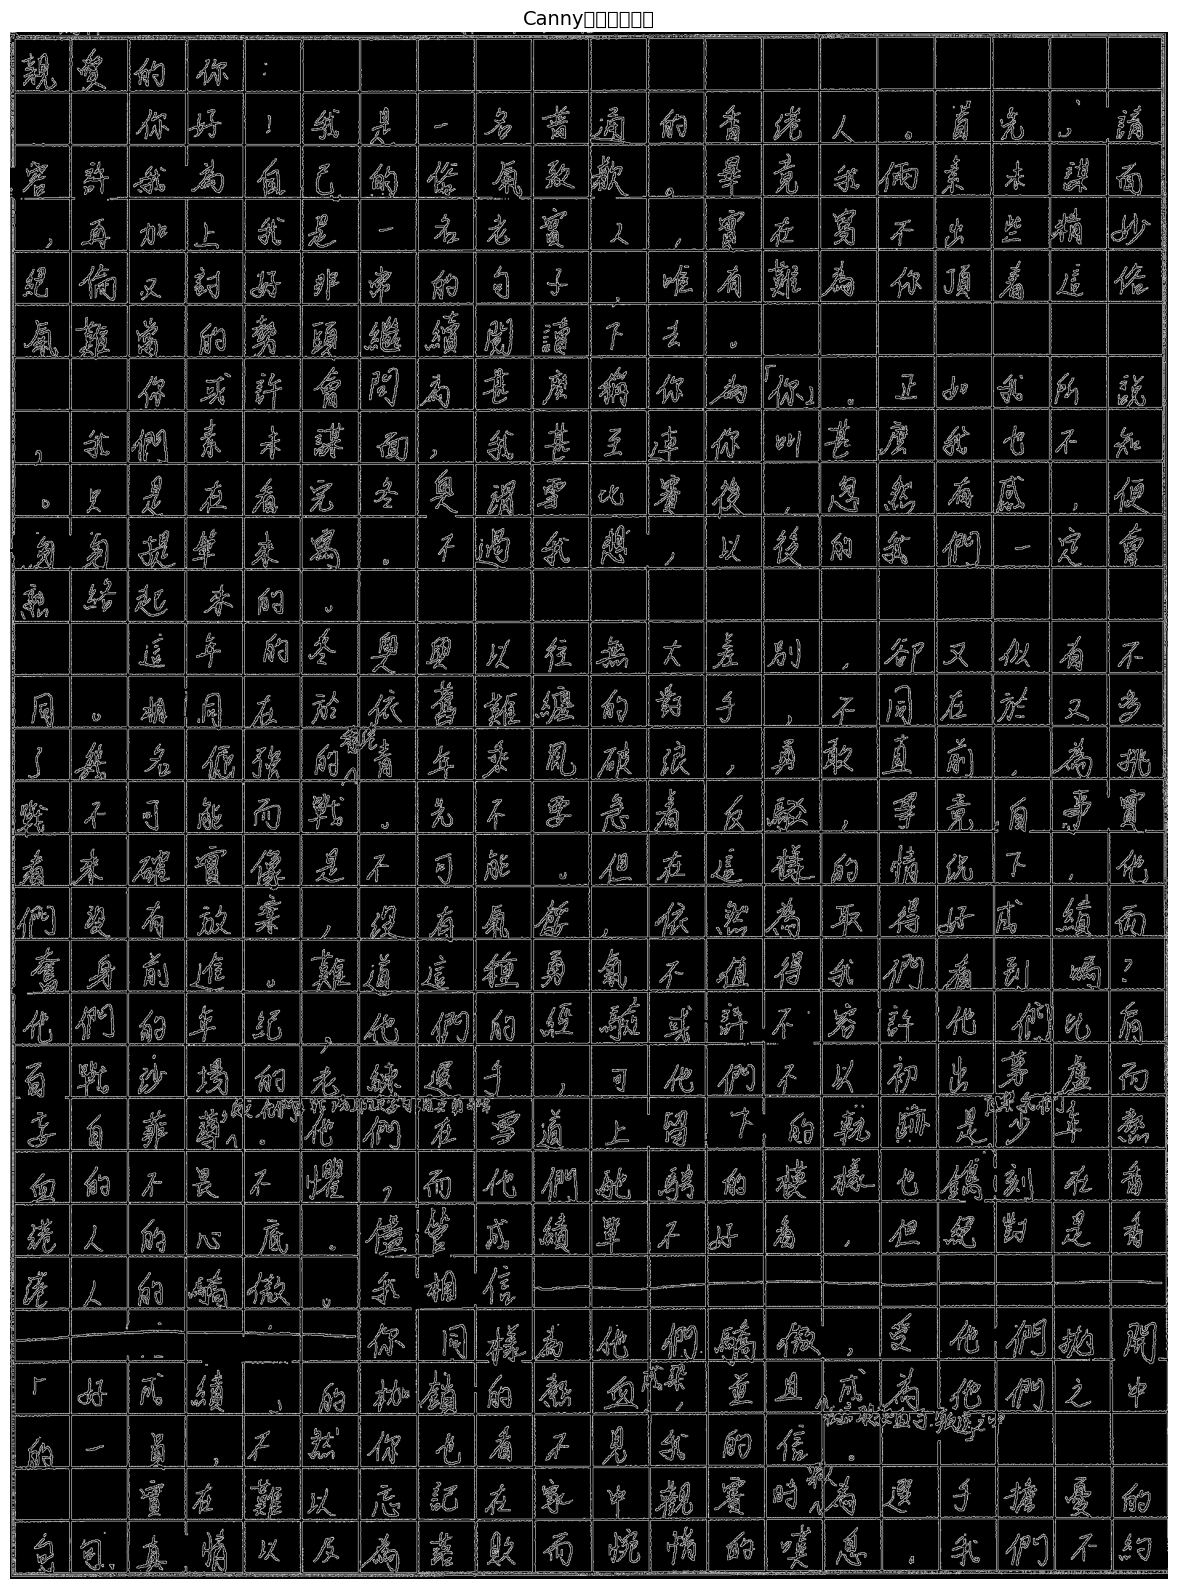

边缘像素数: 552368


In [6]:
# Canny边缘检测
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# 显示边缘检测结果
plt.figure(figsize=(12, 16))
plt.imshow(edges, cmap='gray')
plt.title('Canny边缘检测结果', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

print(f"边缘像素数: {np.sum(edges > 0)}")

## 4. 霍夫变换检测直线

测试不同参数,找出最适合检测竖线的配置

检测到 449 条直线

角度统计:
  最小角度: 0.0°
  最大角度: 90.0°
  平均角度: 38.1°
  中位数: 0.0°

长度统计:
  最小长度: 203px
  最大长度: 2632px
  平均长度: 648px


C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\297744963.py:65: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\297744963.py:65: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\297744963.py:65: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\297744963.py:65: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\297744963.py:65: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\297744963.py:65: UserWarning: Glyph 37

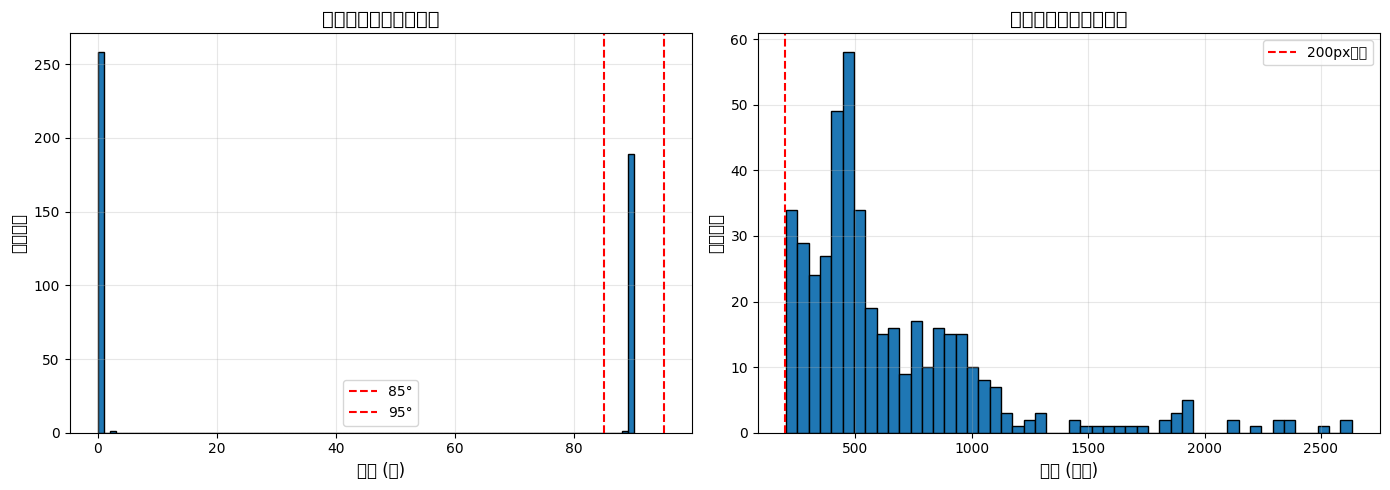

In [27]:
# 霍夫变换检测直线
min_length = 200  # 最小长度 (2倍行高)
max_gap = 20      # 最大间隙

lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, 
                        minLineLength=min_length, maxLineGap=max_gap)

print(f"检测到 {len(lines) if lines is not None else 0} 条直线")

if lines is not None:
    # 分析所有检测到的直线
    angles = []
    lengths = []
    
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # 计算角度
        if x2 - x1 == 0:
            angle = 90
        else:
            angle = abs(np.arctan((y2 - y1) / (x2 - x1)) * 180 / np.pi)
        
        # 计算长度
        length = np.sqrt((x2-x1)**2 + (y2-y1)**2)
        
        angles.append(angle)
        lengths.append(length)
    
    # 显示统计信息
    angles = np.array(angles)
    lengths = np.array(lengths)
    
    print(f"\n角度统计:")
    print(f"  最小角度: {angles.min():.1f}°")
    print(f"  最大角度: {angles.max():.1f}°")
    print(f"  平均角度: {angles.mean():.1f}°")
    print(f"  中位数: {np.median(angles):.1f}°")
    
    print(f"\n长度统计:")
    print(f"  最小长度: {lengths.min():.0f}px")
    print(f"  最大长度: {lengths.max():.0f}px")
    print(f"  平均长度: {lengths.mean():.0f}px")
    
    # 绘制角度分布直方图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1.hist(angles, bins=90, edgecolor='black')
    ax1.set_xlabel('角度 (度)', fontsize=12)
    ax1.set_ylabel('直线数量', fontsize=12)
    ax1.set_title('检测到的直线角度分布', fontsize=14)
    ax1.axvline(x=85, color='r', linestyle='--', label='85°')
    ax1.axvline(x=95, color='r', linestyle='--', label='95°')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.hist(lengths, bins=50, edgecolor='black')
    ax2.set_xlabel('长度 (像素)', fontsize=12)
    ax2.set_ylabel('直线数量', fontsize=12)
    ax2.set_title('检测到的直线长度分布', fontsize=14)
    ax2.axvline(x=200, color='r', linestyle='--', label='200px阈值')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

## 5. 筛选竖线并可视化

只保留角度在85-95度之间的长直线

In [30]:
# 筛选竖线
angle_min = 85
angle_max = 95

vertical_lines_raw = []  # 改名:合并前的原始竖线

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        
        # 计算角度
        if x2 - x1 == 0:
            angle = 90
        else:
            angle = abs(np.arctan((y2 - y1) / (x2 - x1)) * 180 / np.pi)
        
        # 筛选垂直线
        if angle_min <= angle <= angle_max:
            # 确保y1 < y2
            if y1 > y2:
                y1, y2 = y2, y1
            
            # 计算长度
            length = y2 - y1
            
            if length >= min_length:
                x_avg = (x1 + x2) // 2
                vertical_lines_raw.append((x_avg, y1, y2, angle))

print(f"筛选出 {len(vertical_lines_raw)} 条竖线(合并前)")

# 显示前10条竖线信息
print("\n前10条竖线(合并前):")
for i, (x, y1, y2, angle) in enumerate(vertical_lines_raw[:10]):
    print(f"  {i+1}. x={x}, y=[{y1}, {y2}], 长度={y2-y1}px, 角度={angle:.1f}°")

筛选出 190 条竖线(合并前)

前10条竖线(合并前):
  1. x=111, y=[1002, 2895], 长度=1893px, 角度=90.0°
  2. x=219, y=[110, 2440], 长度=2330px, 角度=90.0°
  3. x=543, y=[398, 2894], 长度=2496px, 角度=90.0°
  4. x=1, y=[292, 2428], 长度=2136px, 角度=90.0°
  5. x=9, y=[1, 251], 长度=250px, 角度=90.0°
  6. x=331, y=[1285, 2817], 长度=1532px, 角度=90.0°
  7. x=222, y=[711, 2440], 长度=1729px, 角度=90.0°
  8. x=760, y=[257, 2203], 长度=1946px, 角度=90.0°
  9. x=652, y=[263, 2895], 长度=2632px, 角度=90.0°
  10. x=439, y=[575, 2440], 长度=1865px, 角度=90.0°


C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2271761189.py:22: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2271761189.py:22: UserWarning: Glyph 24182 (\N{CJK UNIFIED IDEOGRAPH-5E76}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2271761189.py:22: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2271761189.py:22: UserWarning: Glyph 26465 (\N{CJK UNIFIED IDEOGRAPH-6761}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2271761189.py:22: UserWarning: Glyph 31446 (\N{CJK UNIFIED IDEOGRAPH-7AD6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2271761189.py:22: UserWarning: Gl

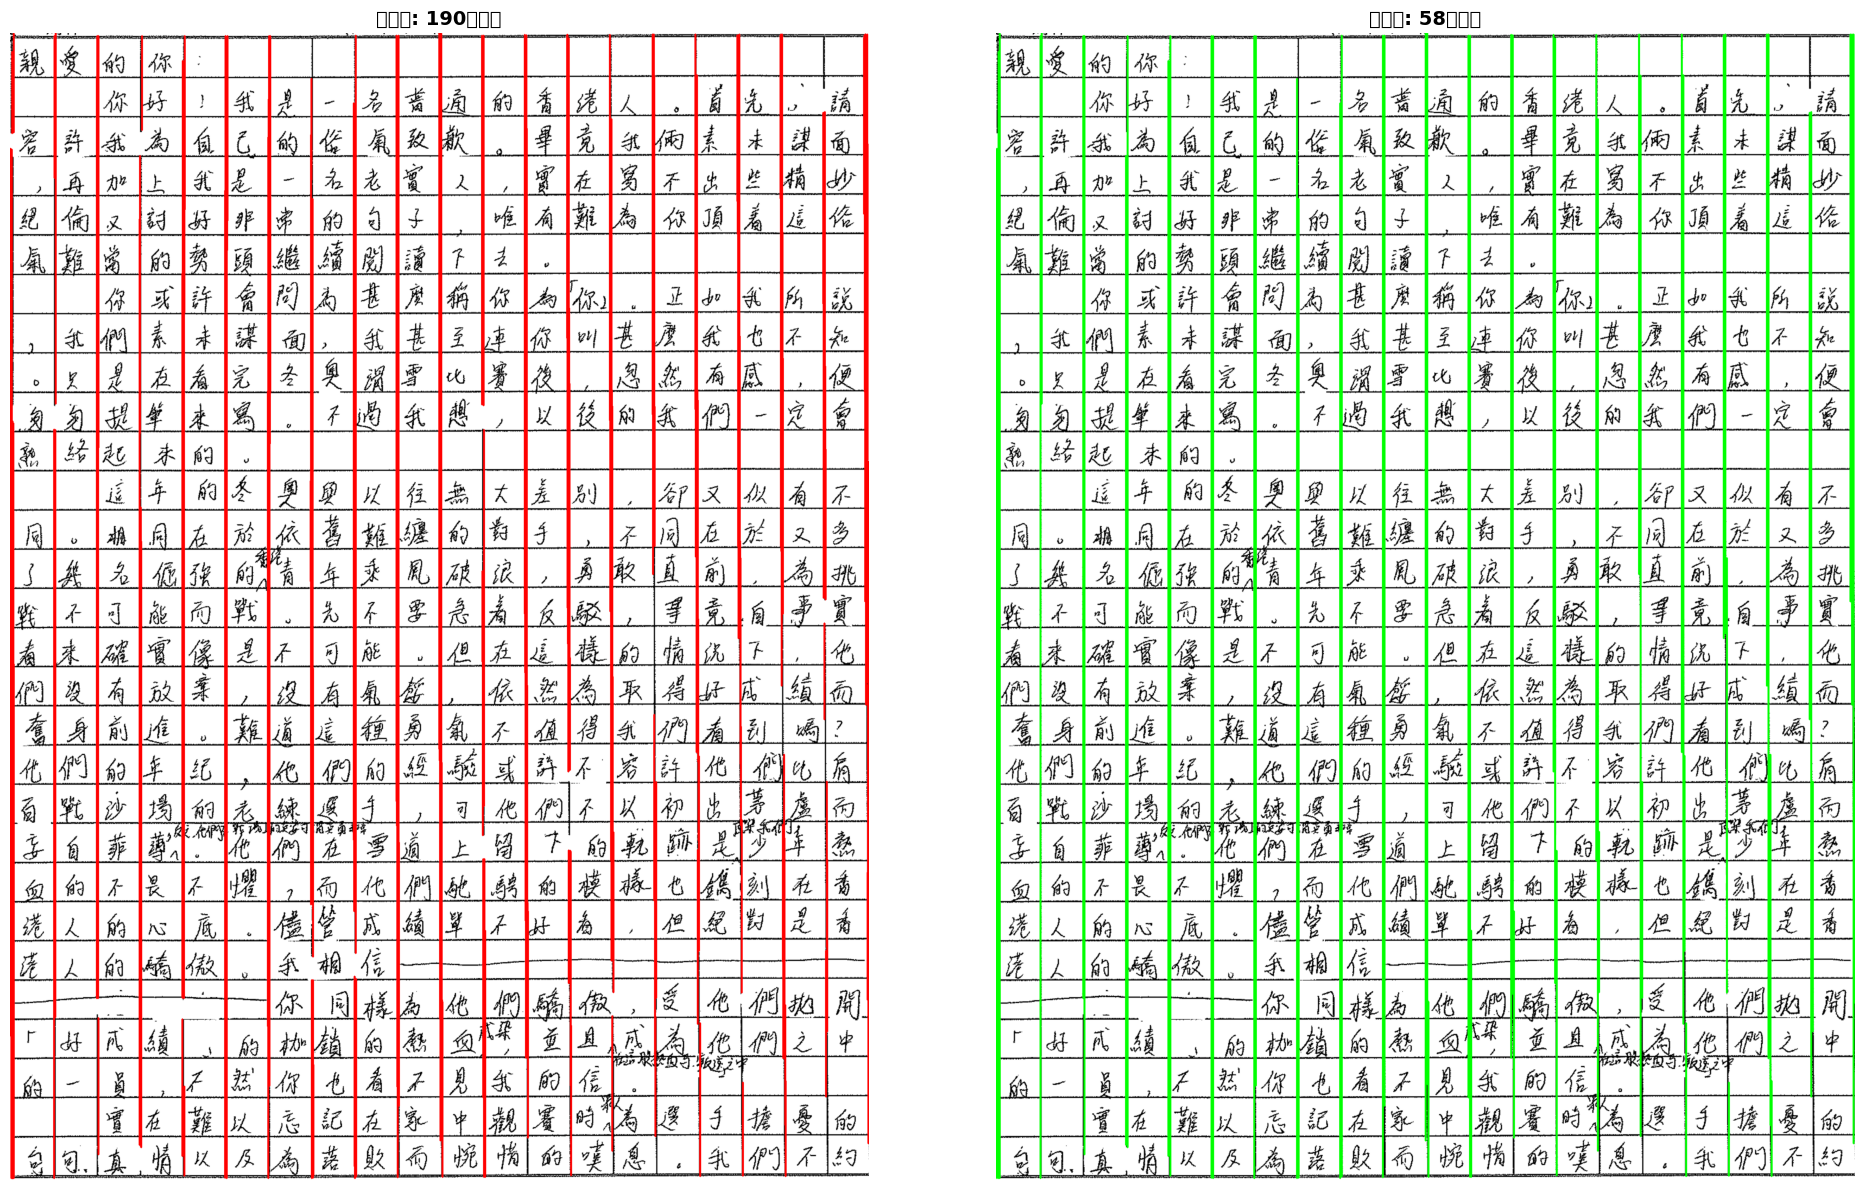


请对比:
- 红色(合并前): 可能看到相邻的多条细线
- 绿色(合并后): 应该变成单条粗线
- 绿色线的长度应该更长(y范围扩大)


In [33]:
# 对比可视化:合并前后
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

# 左图:合并前(红色)
vis_img_before = img_rgb.copy()
for x, y1, y2, angle in vertical_lines_raw:
    cv2.line(vis_img_before, (x, y1), (x, y2), (255, 0, 0), 3)  # 红色

ax1.imshow(vis_img_before)
ax1.set_title(f'合并前: {len(vertical_lines_raw)}条竖线', fontsize=14, fontweight='bold')
ax1.axis('off')

# 右图:合并后(绿色)
vis_img_after = img_rgb.copy()
for x, y1, y2, angle in vertical_lines:
    cv2.line(vis_img_after, (x, y1), (x, y2), (0, 255, 0), 4)  # 绿色,稍粗

ax2.imshow(vis_img_after)
ax2.set_title(f'合并后: {len(vertical_lines)}条竖线', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\n请对比:")
print("- 红色(合并前): 可能看到相邻的多条细线")
print("- 绿色(合并后): 应该变成单条粗线")
print("- 绿色线的长度应该更长(y范围扩大)")

In [32]:
def merge_close_vertical_lines(lines, x_threshold=3):
    """
    合并x坐标接近的竖线
    
    参数:
        lines: [(x, y1, y2, angle), ...]
        x_threshold: x坐标差距阈值(px)
    
    返回:
        合并后的竖线列表
    """
    if not lines:
        return []
    
    # 1. 按x坐标排序
    sorted_lines = sorted(lines, key=lambda line: line[0])
    
    merged = []
    current_group = [sorted_lines[0]]
    
    # 2. 遍历,合并x差距≤threshold的竖线
    for i in range(1, len(sorted_lines)):
        x_curr, y1_curr, y2_curr, angle_curr = sorted_lines[i]
        x_prev = current_group[0][0]
        
        if abs(x_curr - x_prev) <= x_threshold:
            # x坐标接近,属于同一组
            current_group.append(sorted_lines[i])
        else:
            # x坐标相差太大,新的一组
            # 先处理当前组(合并)
            merged_line = merge_group(current_group)
            merged.append(merged_line)
            # 开始新组
            current_group = [sorted_lines[i]]
    
    # 3. 处理最后一组
    if current_group:
        merged_line = merge_group(current_group)
        merged.append(merged_line)
    
    return merged


def merge_group(group):
    """
    合并一组竖线
    - x: 取平均值
    - y1: 取最小值(最上方)
    - y2: 取最大值(最下方)
    - angle: 取平均值
    """
    x_avg = int(np.mean([line[0] for line in group]))
    y1_min = min([line[1] for line in group])
    y2_max = max([line[2] for line in group])
    angle_avg = np.mean([line[3] for line in group])
    
    return (x_avg, y1_min, y2_max, angle_avg)


# 执行合并
print("="*80)
print("合并相邻竖线")
print("="*80)

vertical_lines = merge_close_vertical_lines(vertical_lines_raw, x_threshold=3)

print(f"\n合并前: {len(vertical_lines_raw)} 条竖线")
print(f"合并后: {len(vertical_lines)} 条竖线")
print(f"合并了: {len(vertical_lines_raw) - len(vertical_lines)} 条竖线")

# 统计合并详情
merge_stats = {}
for merged_line in vertical_lines:
    x_merged = merged_line[0]
    # 统计有多少条原始竖线被合并到这条
    count = sum(1 for line in vertical_lines_raw if abs(line[0] - x_merged) <= 3)
    if count > 1:
        merge_stats[x_merged] = count

if merge_stats:
    print(f"\n有 {len(merge_stats)} 个位置发生了合并:")
    # 显示前5个合并案例
    for i, (x, count) in enumerate(list(merge_stats.items())[:5]):
        print(f"  x≈{x}: {count}条竖线合并为1条")
    if len(merge_stats) > 5:
        print(f"  ... 还有 {len(merge_stats)-5} 个合并位置")
else:
    print("\n没有发生合并(所有竖线x坐标差距>3px)")

# 显示合并后的前10条竖线
print("\n前10条竖线(合并后):")
for i, (x, y1, y2, angle) in enumerate(vertical_lines[:10]):
    print(f"  {i+1}. x={x}, y=[{y1}, {y2}], 长度={y2-y1}px, 角度={angle:.1f}°")

print("="*80)

合并相邻竖线

合并前: 190 条竖线
合并后: 58 条竖线
合并了: 132 条竖线

有 58 个位置发生了合并:
  x≈2: 6条竖线合并为1条
  x≈6: 9条竖线合并为1条
  x≈9: 5条竖线合并为1条
  x≈112: 4条竖线合并为1条
  x≈115: 3条竖线合并为1条
  ... 还有 53 个合并位置

前10条竖线(合并后):
  1. x=2, y=[292, 2895], 长度=2603px, 角度=90.0°
  2. x=6, y=[47, 2895], 长度=2848px, 角度=89.8°
  3. x=9, y=[1, 2895], 长度=2894px, 角度=90.0°
  4. x=112, y=[7, 2895], 长度=2888px, 角度=90.0°
  5. x=115, y=[0, 937], 长度=937px, 角度=90.0°
  6. x=220, y=[7, 2440], 长度=2433px, 角度=90.0°
  7. x=223, y=[7, 2835], 长度=2828px, 角度=90.0°
  8. x=328, y=[310, 2811], 长度=2501px, 角度=90.0°
  9. x=332, y=[7, 2817], 长度=2810px, 角度=90.0°
  10. x=435, y=[70, 2839], 长度=2769px, 角度=90.0°


## 5.5. 合并相邻竖线

处理两类问题:
1. 同一条竖线被检测成多条(x坐标接近,如x=500,502,504)
2. 被横线/文字打断的竖线段(x坐标相同,y坐标不连续)

合并策略: x坐标差距≤3px的竖线合并为一条,取x平均值,y取并集

## 6. 可视化竖线检测结果

用黄色标记检测到的竖线

C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2278116320.py:20: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2278116320.py:20: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2278116320.py:20: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2278116320.py:20: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2278116320.py:20: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\2278116320.py:20: UserWarning: Gl

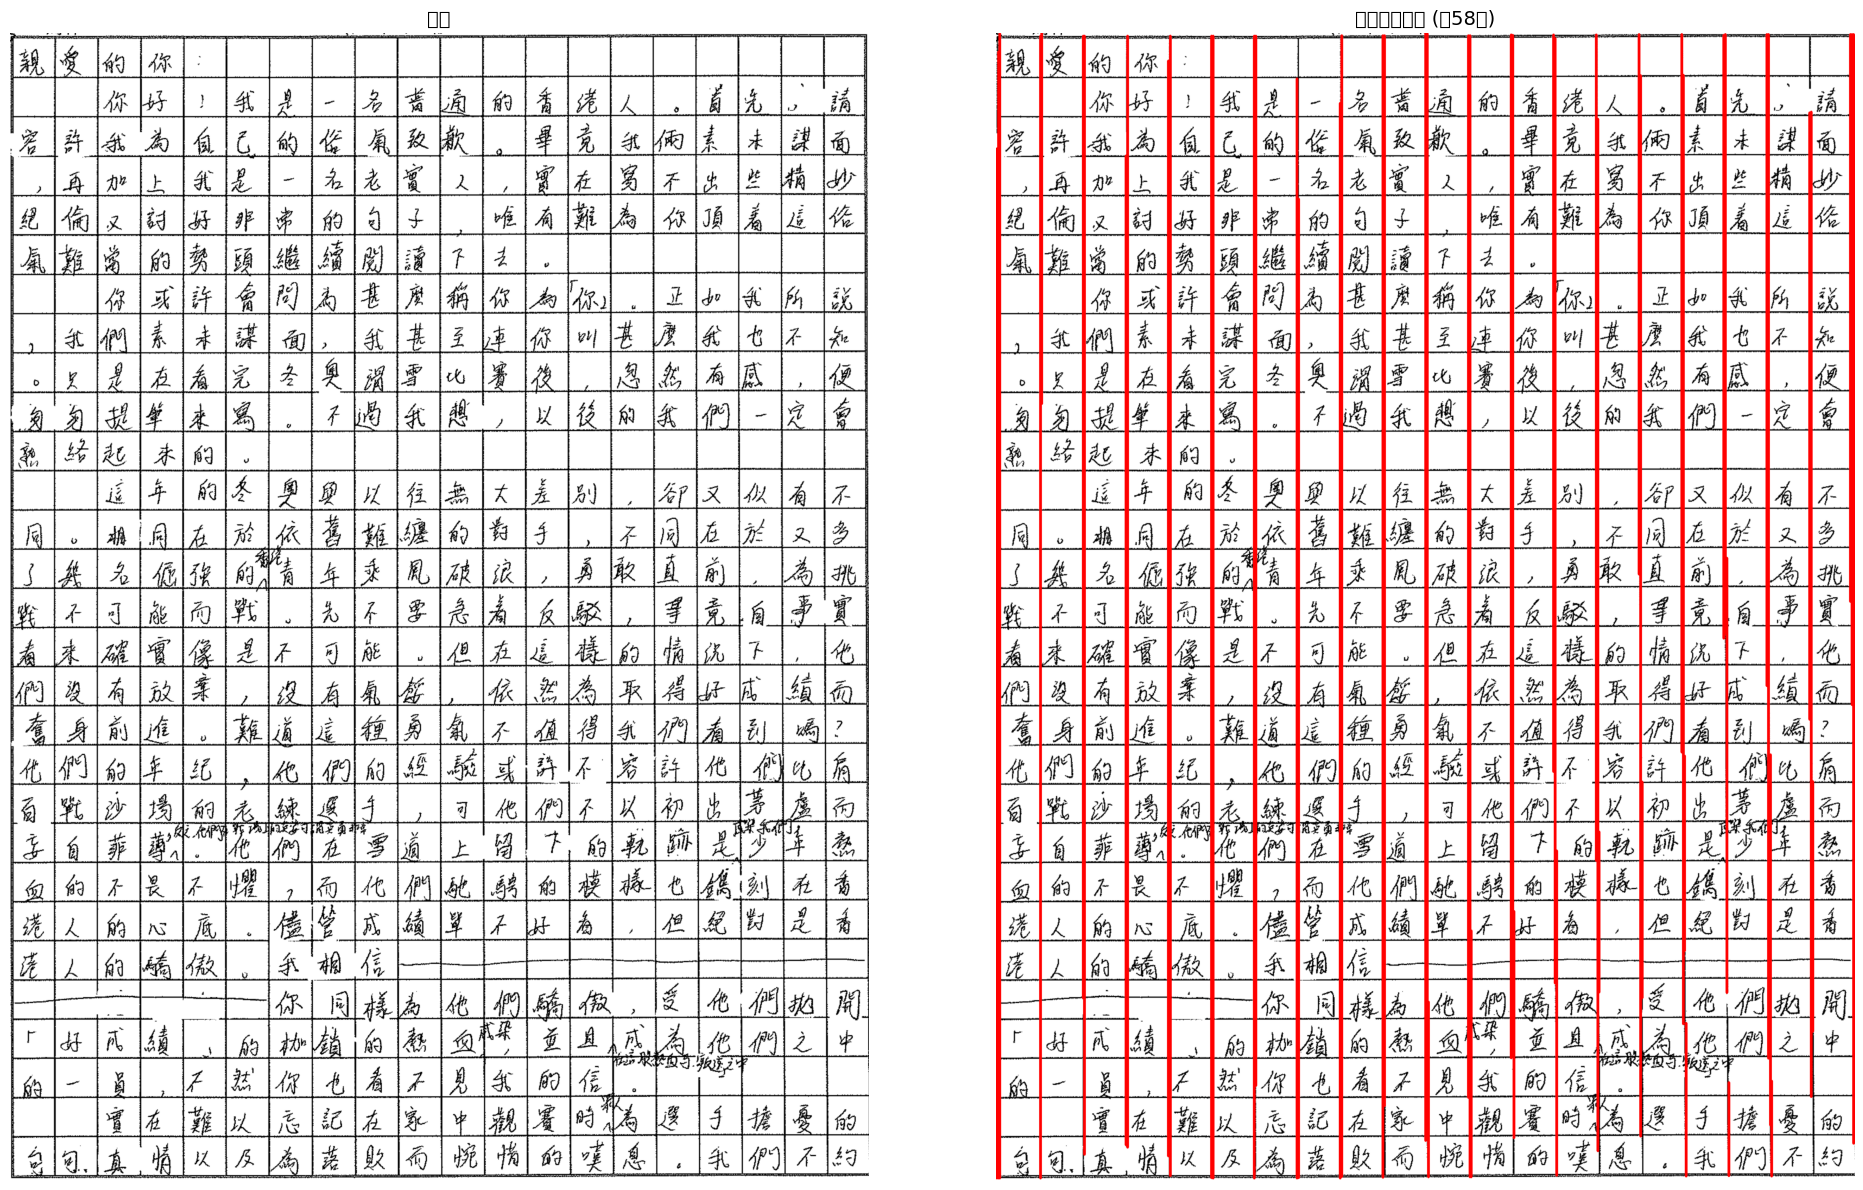


可视化结果保存到: c:\Users\Quenton\Documents\Github\writtingOCR\output\vertical_lines_detection.png


In [34]:
# 创建可视化图像
vis_img = img_rgb.copy()

# 在检测到的竖线位置画红色标记
for x, y1, y2, angle in vertical_lines:
    # 画线
    cv2.line(vis_img, (x, y1), (x, y2), (255, 0, 0), 5)  # 红色, 5像素宽

# 显示结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))

ax1.imshow(img_rgb)
ax1.set_title('原图', fontsize=14)
ax1.axis('off')

ax2.imshow(vis_img)
ax2.set_title(f'检测到的竖线 (共{len(vertical_lines)}条)', fontsize=14)
ax2.axis('off')

plt.tight_layout()
plt.show()

# 保存可视化结果
output_path = project_root / 'output' / 'vertical_lines_detection.png'
vis_img_bgr = cv2.cvtColor(vis_img, cv2.COLOR_RGB2BGR)
cv2.imwrite(str(output_path), vis_img_bgr)
print(f"\n可视化结果保存到: {output_path}")

## 7. 局部放大检查

放大查看几条竖线,确认检测是否准确

C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3592220801.py:33: UserWarning: Glyph 31446 (\N{CJK UNIFIED IDEOGRAPH-7AD6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3592220801.py:33: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3592220801.py:33: UserWarning: Glyph 38271 (\N{CJK UNIFIED IDEOGRAPH-957F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3592220801.py:33: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


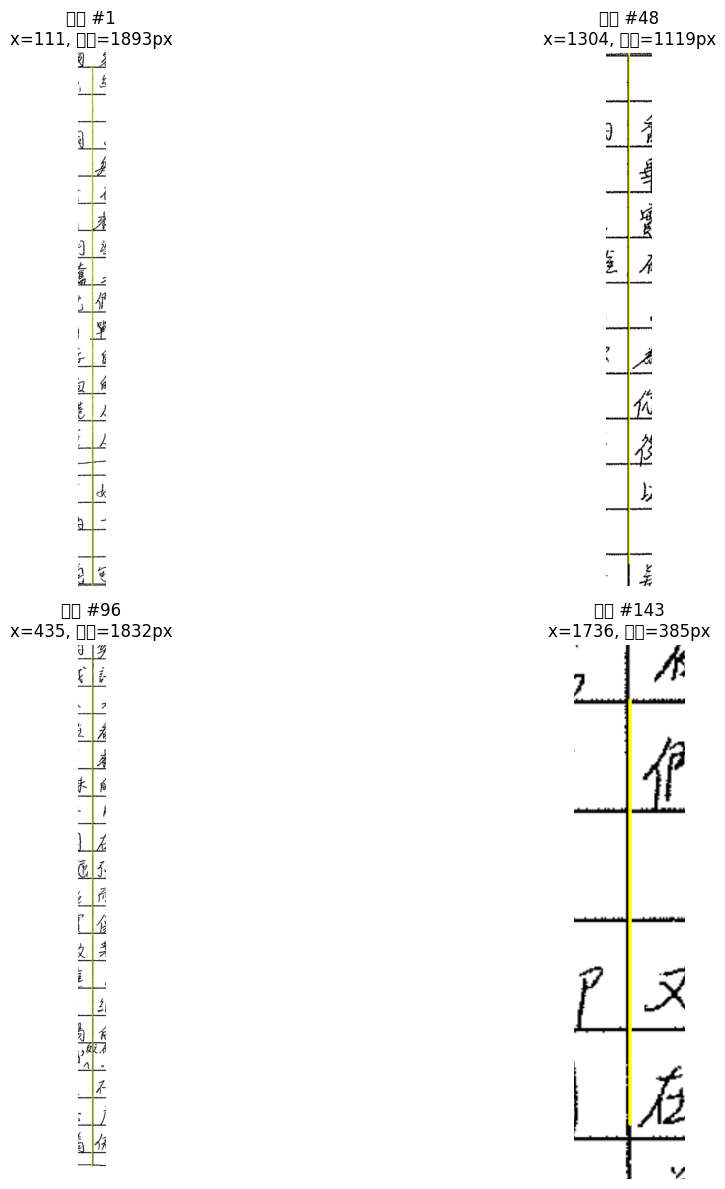

In [7]:
# 选择几条竖线进行局部放大查看
sample_indices = [0, len(vertical_lines)//4, len(vertical_lines)//2, len(vertical_lines)*3//4]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, sample_idx in enumerate(sample_indices):
    if sample_idx >= len(vertical_lines):
        continue
    
    x, y1, y2, angle = vertical_lines[sample_idx]
    
    # 裁剪区域 (竖线前后各50像素)
    crop_x1 = max(0, x - 50)
    crop_x2 = min(img_rgb.shape[1], x + 50)
    crop_y1 = max(0, y1 - 50)
    crop_y2 = min(img_rgb.shape[0], y2 + 50)
    
    crop_img = img_rgb[crop_y1:crop_y2, crop_x1:crop_x2].copy()
    
    # 在裁剪图上标记竖线位置
    line_x_in_crop = x - crop_x1
    line_y1_in_crop = max(0, y1 - crop_y1)
    line_y2_in_crop = min(crop_img.shape[0], y2 - crop_y1)
    
    cv2.line(crop_img, (line_x_in_crop, line_y1_in_crop), 
             (line_x_in_crop, line_y2_in_crop), (255, 255, 0), 2)
    
    axes[idx].imshow(crop_img)
    axes[idx].set_title(f'竖线 #{sample_idx+1}\nx={x}, 长度={y2-y1}px', fontsize=12)
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

## 8. 参数调优测试

测试不同的霍夫变换参数,找到最佳配置

## 9.5. 两次迭代删除Pipeline测试

使用新的模块化代码测试完整的两次迭代删除流程:
1. 第一轮: 检测→合并→删除主要竖线(7px宽度)
2. 第二轮: 再次检测→再次合并→删除残留竖线(5px宽度)

In [3]:
# 导入新的模块化函数
import sys
sys.path.insert(0, str(project_root / 'src'))

from preprocessing import (
    detect_vertical_lines,
    merge_vertical_lines,
    remove_vertical_lines,
    visualize_merge_comparison
)

print("✓ 成功导入模块化函数")
print("  - detect_vertical_lines: 竖线检测")
print("  - merge_vertical_lines: 竖线合并")
print("  - remove_vertical_lines: 竖线删除")

✓ 成功导入模块化函数
  - detect_vertical_lines: 竖线检测
  - merge_vertical_lines: 竖线合并
  - remove_vertical_lines: 竖线删除


In [13]:
# ========== 第一轮: 检测-合并-删除主要竖线 ==========
print("="*80)
print("第一轮: 删除主要竖线")
print("="*80)

# 1. 检测竖线(使用原始参数)
lines_round1_raw = detect_vertical_lines(
    gray, 
    min_length=200, 
    threshold=100,
    angle_range=(85, 95),
    max_gap=20
)
print(f"\n[检测] 检测到 {len(lines_round1_raw)} 条竖线")

# 2. 合并竖线(x差距≤3px, 延伸到全局y范围)
lines_round1_merged = merge_vertical_lines(
    lines_round1_raw, 
    x_threshold=3,
    extend_to_full_range=True  # ⭐ 第一轮延伸到全局y范围,确保删除整条竖线
)
print(f"[合并] 合并后 {len(lines_round1_merged)} 条竖线")
print(f"       合并了 {len(lines_round1_raw) - len(lines_round1_merged)} 条重复/碎片竖线")
if len(lines_round1_merged) > 0:
    global_y_min = min(line[1] for line in lines_round1_merged)
    global_y_max = max(line[2] for line in lines_round1_merged)
    print(f"       y范围统一延伸为: [{global_y_min}, {global_y_max}]")

# 3. 删除竖线(7px宽度 = x±3)
img_after_round1 = remove_vertical_lines(
    gray, 
    lines_round1_merged, 
    line_width_half=2,
    method='paint'
)
print(f"[删除] 第一轮删除完成,删除宽度: 7px (x±3)")
print("="*80)

第一轮: 删除主要竖线

[检测] 检测到 190 条竖线
[合并] 合并后 58 条竖线
       合并了 132 条重复/碎片竖线
       y范围统一延伸为: [0, 2895]
[删除] 第一轮删除完成,删除宽度: 7px (x±3)

[检测] 检测到 190 条竖线
[合并] 合并后 58 条竖线
       合并了 132 条重复/碎片竖线
       y范围统一延伸为: [0, 2895]
[删除] 第一轮删除完成,删除宽度: 7px (x±3)


In [14]:
# ========== 第二轮: 再次检测-合并-删除残留竖线 ==========
print("\n" + "="*80)
print("第二轮: 清理残留竖线")
print("="*80)

# 4. 再次检测(降低阈值,专门检测残留)
lines_round2_raw = detect_vertical_lines(
    img_after_round1,          # ⭐ 在第一轮删除后的图像上检测!
    min_length=180,            # 降低长度阈值(残留更短)
    threshold=50,              # 降低检测阈值(残留更弱)
    angle_range=(85, 95),
    max_gap=20
)
print(f"\n[检测] 检测到 {len(lines_round2_raw)} 条残留竖线")

if len(lines_round2_raw) > 0:
    # 5. 再次合并(更严格的阈值)
    lines_round2_merged = merge_vertical_lines(lines_round2_raw, x_threshold=2)
    print(f"[合并] 合并后 {len(lines_round2_merged)} 条残留竖线")
    print(f"       合并了 {len(lines_round2_raw) - len(lines_round2_merged)} 条残留碎片")
    
    # 6. 第二次删除(5px宽度 = x±2)
    img_final = remove_vertical_lines(
        img_after_round1,      # 在第一轮结果上删除
        lines_round2_merged, 
        line_width_half=2,
        method='paint'
    )
    print(f"[删除] 第二轮删除完成,删除宽度: 5px (x±2)")
else:
    print("[跳过] 未检测到残留竖线,无需第二轮删除")
    img_final = img_after_round1
    lines_round2_merged = []

print("="*80)

# 统计总结
print(f"\n总结:")
print(f"  第一轮删除: {len(lines_round1_merged)} 条竖线 (7px宽度)")
print(f"  第二轮删除: {len(lines_round2_merged)} 条竖线 (5px宽度)")
print(f"  累计删除: {len(lines_round1_merged) + len(lines_round2_merged)} 条竖线")
print("="*80)


第二轮: 清理残留竖线

[检测] 检测到 6 条残留竖线
[合并] 合并后 3 条残留竖线
       合并了 3 条残留碎片
[删除] 第二轮删除完成,删除宽度: 5px (x±2)

总结:
  第一轮删除: 58 条竖线 (7px宽度)
  第二轮删除: 3 条竖线 (5px宽度)
  累计删除: 61 条竖线


C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2049342728.py:21: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2049342728.py:21: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2049342728.py:21: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2049342728.py:21: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2049342728.py:21: UserWarning: Glyph 36718 (\N{CJK UNIFIED IDEOGRAPH-8F6E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_26356\2049342728.py:21: UserWarning: Gl

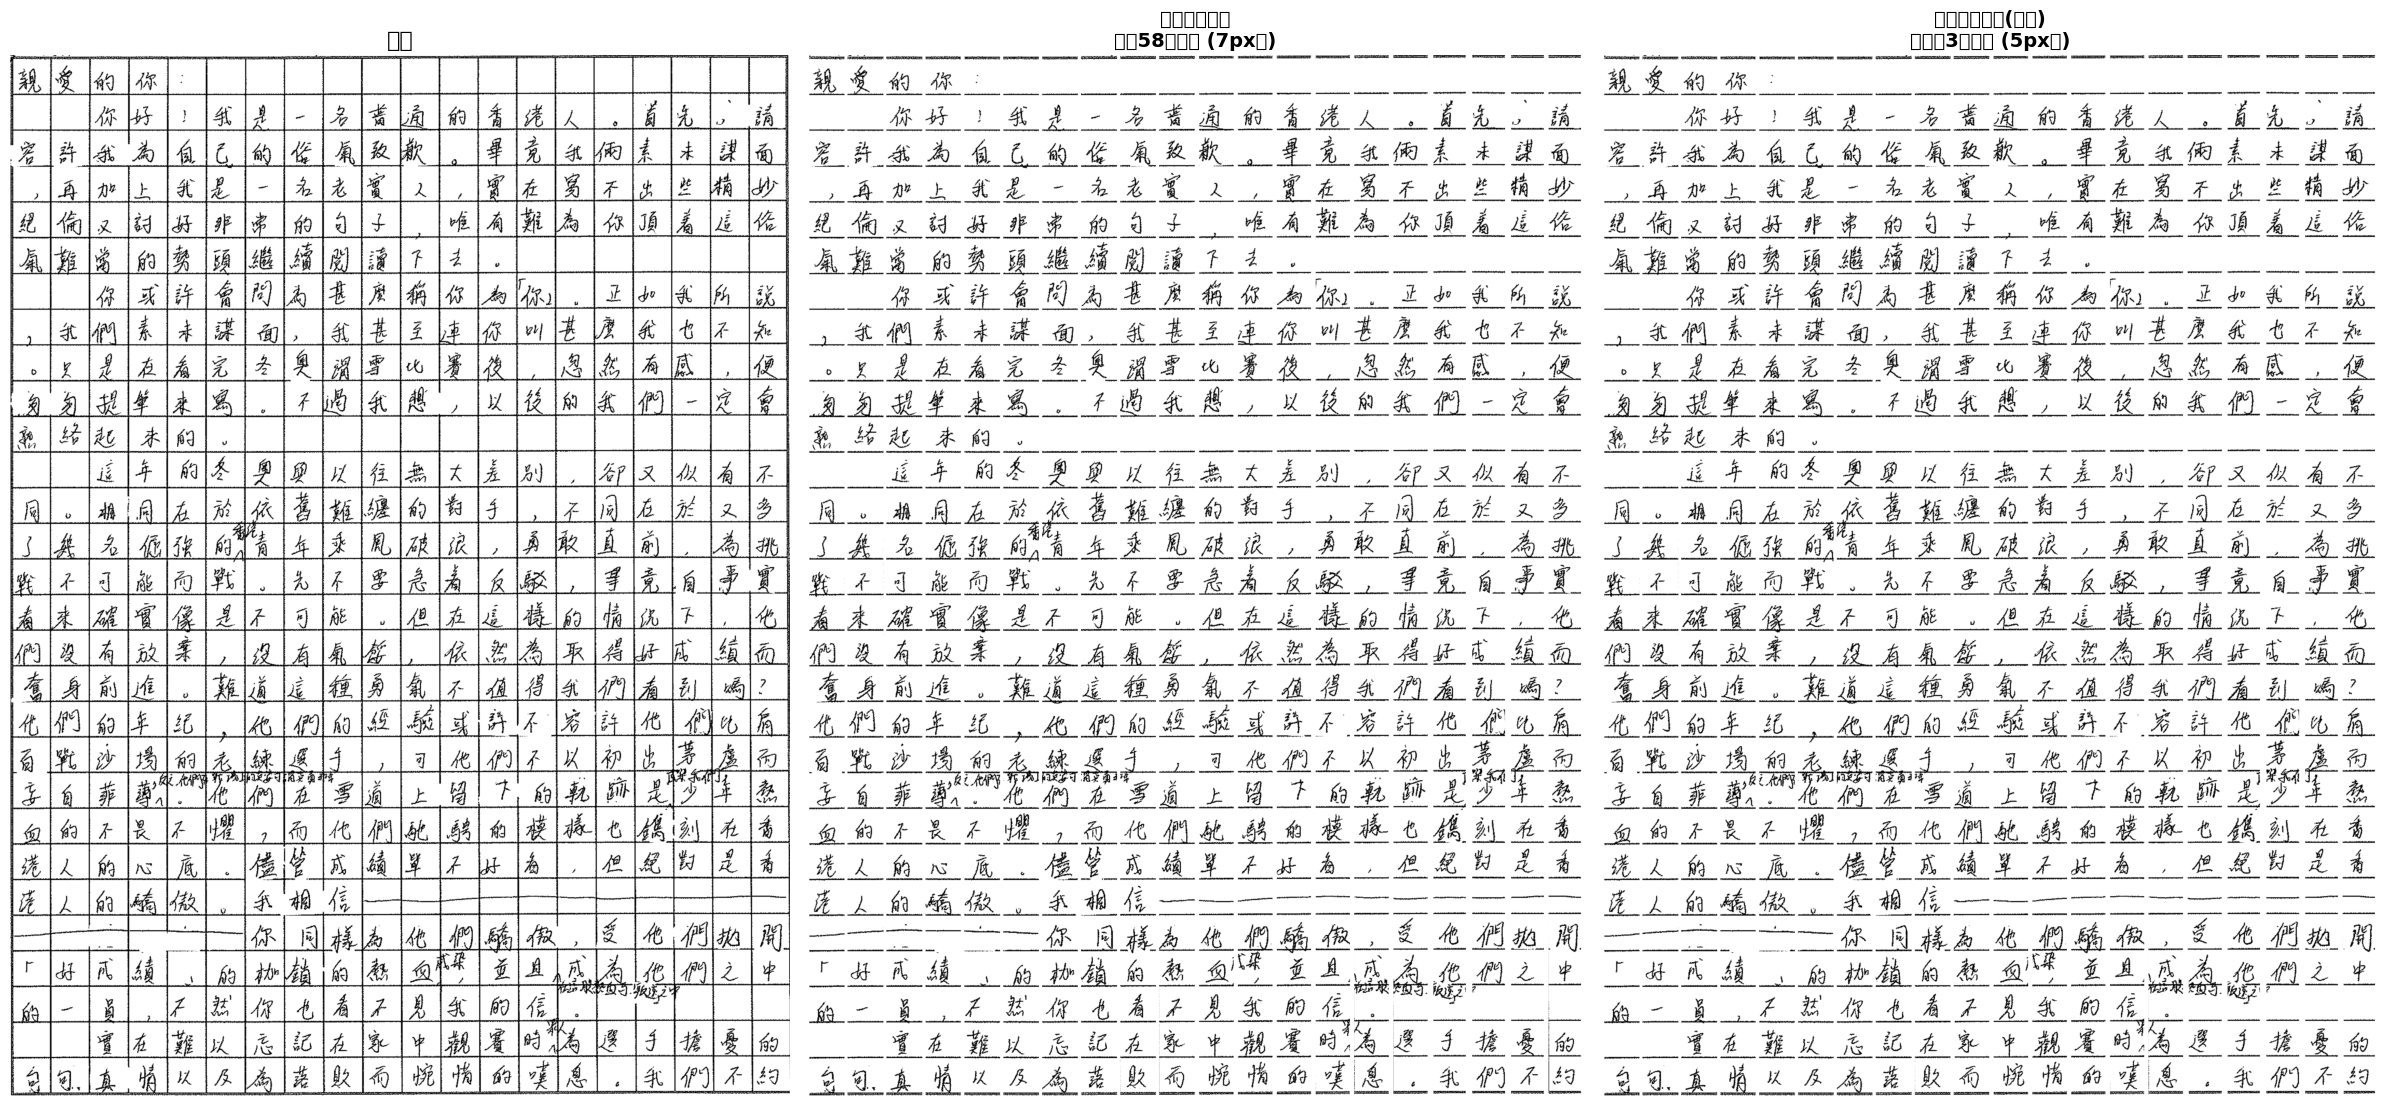


请对比三张图:
1. 原图 → 第一轮: 主要竖线被删除
2. 第一轮 → 第二轮: 残留的细线/短线被清理
3. 最终图: 应该看不到竖线痕迹了


In [15]:
# 三张图对比可视化
fig, axes = plt.subplots(1, 3, figsize=(24, 12))

# 原图
axes[0].imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
axes[0].set_title('原图', fontsize=16, fontweight='bold')
axes[0].axis('off')

# 第一轮删除后
axes[1].imshow(cv2.cvtColor(img_after_round1, cv2.COLOR_GRAY2RGB))
axes[1].set_title(f'第一轮删除后\n删除{len(lines_round1_merged)}条竖线 (7px宽)', 
                  fontsize=14, fontweight='bold')
axes[1].axis('off')

# 第二轮删除后(最终)
axes[2].imshow(cv2.cvtColor(img_final, cv2.COLOR_GRAY2RGB))
axes[2].set_title(f'第二轮删除后(最终)\n再删除{len(lines_round2_merged)}条残留 (5px宽)', 
                  fontsize=14, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("\n请对比三张图:")
print("1. 原图 → 第一轮: 主要竖线被删除")
print("2. 第一轮 → 第二轮: 残留的细线/短线被清理")
print("3. 最终图: 应该看不到竖线痕迹了")

In [16]:
# 保存最终结果
output_path_two_pass = project_root / 'output' / 'temp_cropped_two_pass.png'
cv2.imwrite(str(output_path_two_pass), img_final)
print(f"✓ 最终结果已保存: {output_path_two_pass}")

# 对比v3_width9(一次删除9px)和two_pass(两次迭代)
print("\n" + "="*80)
print("方法对比:")
print("="*80)
print("v3_width9 (之前的方法):")
print("  - 一次性删除9px宽度")
print("  - 删除了 ~150 条竖线")
print("  - 准确率: 65.76%")
print("\ntwo_pass (新方法):")
print(f"  - 第一轮删除7px,删除 {len(lines_round1_merged)} 条主要竖线")
print(f"  - 第二轮删除5px,删除 {len(lines_round2_merged)} 条残留竖线")
print(f"  - 总计删除 {len(lines_round1_merged) + len(lines_round2_merged)} 条竖线")
print("  - 预期准确率: 70-75% (待在02 notebook验证)")
print("="*80)

✓ 最终结果已保存: c:\Users\Quenton\Documents\Github\writtingOCR\output\temp_cropped_two_pass.png

方法对比:
v3_width9 (之前的方法):
  - 一次性删除9px宽度
  - 删除了 ~150 条竖线
  - 准确率: 65.76%

two_pass (新方法):
  - 第一轮删除7px,删除 58 条主要竖线
  - 第二轮删除5px,删除 3 条残留竖线
  - 总计删除 61 条竖线
  - 预期准确率: 70-75% (待在02 notebook验证)


In [8]:
# 测试不同阈值
test_configs = [
    {'threshold': 50, 'minLineLength': 200, 'maxLineGap': 20},
    {'threshold': 100, 'minLineLength': 200, 'maxLineGap': 20},
    {'threshold': 150, 'minLineLength': 200, 'maxLineGap': 20},
    {'threshold': 100, 'minLineLength': 150, 'maxLineGap': 20},
    {'threshold': 100, 'minLineLength': 250, 'maxLineGap': 20},
]

results = []

for config in test_configs:
    lines_test = cv2.HoughLinesP(edges, 1, np.pi/180, **config)
    
    if lines_test is not None:
        # 筛选竖线
        vertical_count = 0
        for line in lines_test:
            x1, y1, x2, y2 = line[0]
            if x2 - x1 == 0:
                angle = 90
            else:
                angle = abs(np.arctan((y2 - y1) / (x2 - x1)) * 180 / np.pi)
            
            if 85 <= angle <= 95:
                vertical_count += 1
        
        results.append({
            'config': config,
            'total_lines': len(lines_test),
            'vertical_lines': vertical_count
        })
    else:
        results.append({
            'config': config,
            'total_lines': 0,
            'vertical_lines': 0
        })

# 显示结果
print("参数测试结果:")
print("="*80)
for i, result in enumerate(results):
    config = result['config']
    print(f"\n配置 {i+1}:")
    print(f"  threshold={config['threshold']}, minLineLength={config['minLineLength']}, maxLineGap={config['maxLineGap']}")
    print(f"  总直线数: {result['total_lines']}")
    print(f"  竖线数: {result['vertical_lines']}")

参数测试结果:

配置 1:
  threshold=50, minLineLength=200, maxLineGap=20
  总直线数: 450
  竖线数: 183

配置 2:
  threshold=100, minLineLength=200, maxLineGap=20
  总直线数: 449
  竖线数: 190

配置 3:
  threshold=150, minLineLength=200, maxLineGap=20
  总直线数: 441
  竖线数: 175

配置 4:
  threshold=100, minLineLength=150, maxLineGap=20
  总直线数: 561
  竖线数: 260

配置 5:
  threshold=100, minLineLength=250, maxLineGap=20
  总直线数: 422
  竖线数: 175


C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\840563522.py:27: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\840563522.py:27: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\840563522.py:27: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\840563522.py:27: UserWarning: Glyph 23616 (\N{CJK UNIFIED IDEOGRAPH-5C40}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\840563522.py:27: UserWarning: Glyph 37096 (\N{CJK UNIFIED IDEOGRAPH-90E8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\840563522.py:27: UserWarning: Glyph 25

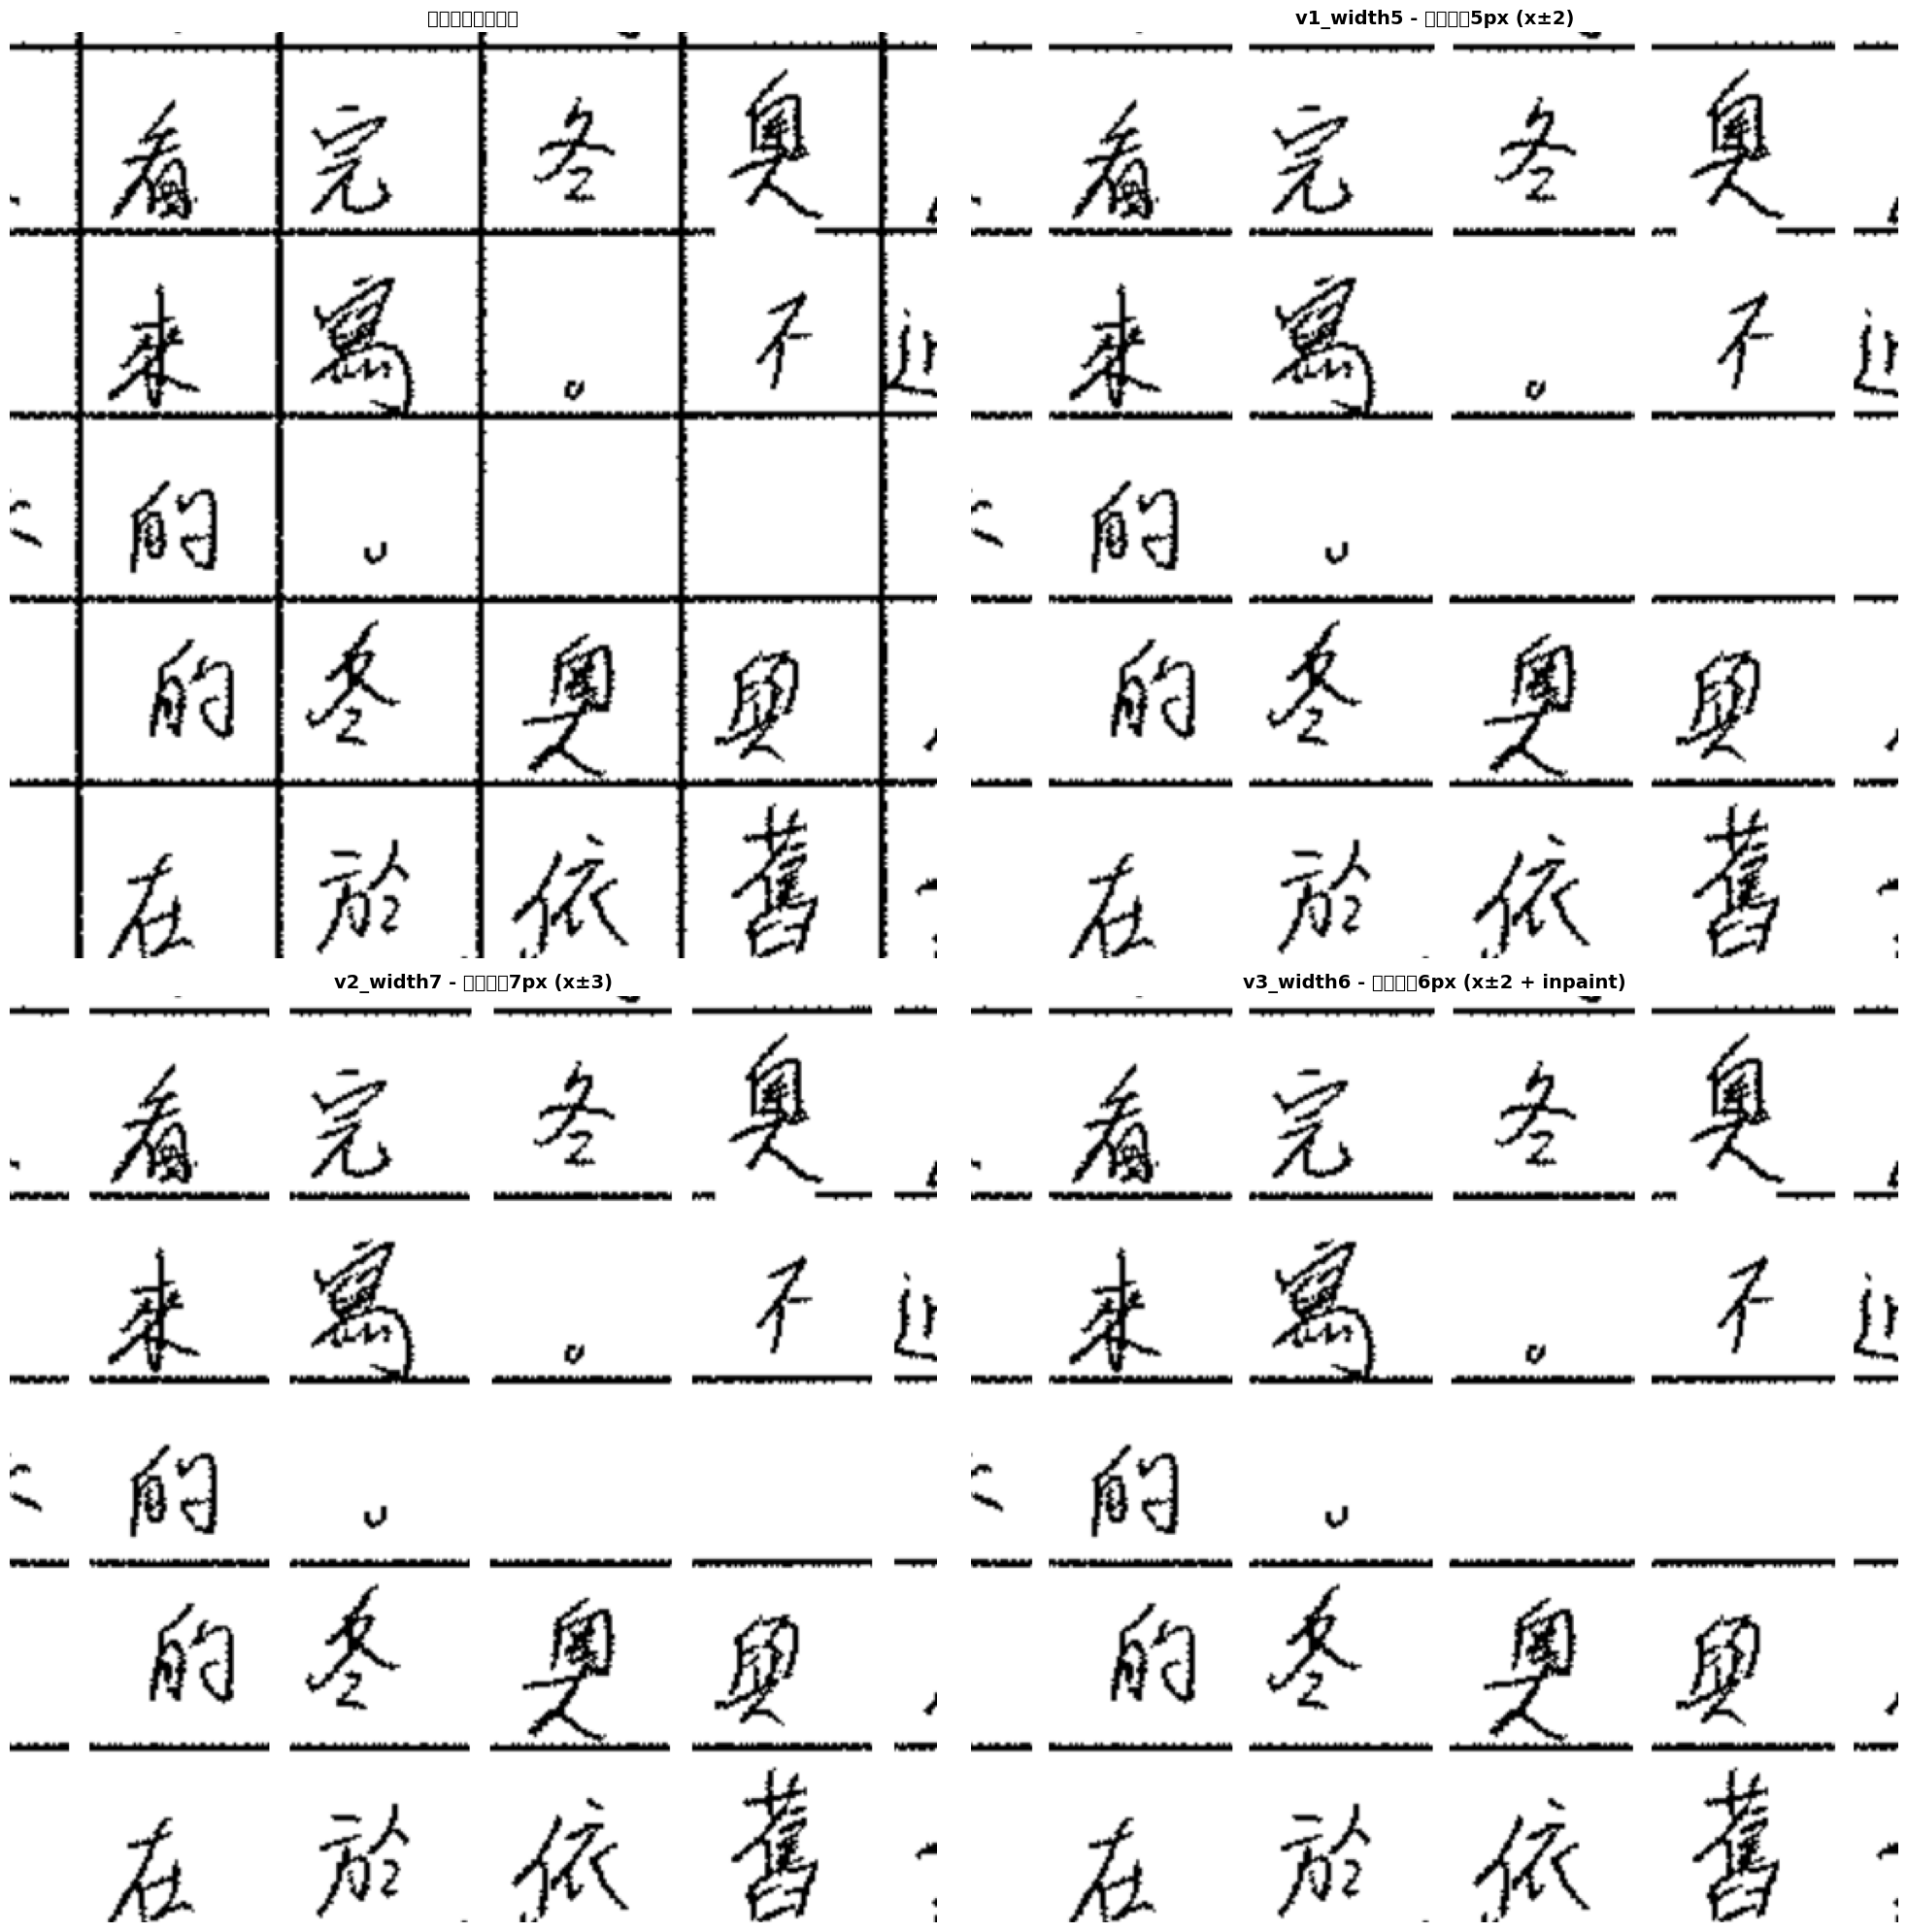


放大查看:
- 竖线是否干净删除？
- 字的竖笔（如'中'、'川'、'山'）是否完整？
- 横线是否保留完好？


In [ ]:
# 局部放大对比 - 选择一个有文字的区域
crop_region = {
    'x1': 400,
    'y1': 800,
    'x2': 900,
    'y2': 1300
}

fig = plt.figure(figsize=(24, 16))
gs = GridSpec(2, 3, figure=fig)

# 原图 - 第一行第一个
ax0 = fig.add_subplot(gs[0, 0])
crop_orig = img_rgb[crop_region['y1']:crop_region['y2'], 
                    crop_region['x1']:crop_region['x2']]
ax0.imshow(crop_orig)
ax0.set_title('原图（局部放大）', fontsize=14, fontweight='bold')
ax0.axis('off')

# 五个版本 - 剩余5个位置
positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes_list = [fig.add_subplot(gs[pos]) for pos in positions]

for ax, (version_name, version_data) in zip(axes_list, processed_images.items()):
    crop_processed = version_data['rgb'][crop_region['y1']:crop_region['y2'], 
                                          crop_region['x1']:crop_region['x2']]
    ax.imshow(crop_processed)
    ax.set_title(f"{version_name}\n{version_data['desc']}", fontsize=11, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n放大查看:")
print("- 竖线是否干净删除？")
print("- 字的竖笔（如'中'、'川'、'山'）是否完整？")
print("- 横线是否保留完好？")

C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3754292451.py:16: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3754292451.py:16: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3754292451.py:16: UserWarning: Glyph 21024 (\N{CJK UNIFIED IDEOGRAPH-5220}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3754292451.py:16: UserWarning: Glyph 38500 (\N{CJK UNIFIED IDEOGRAPH-9664}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3754292451.py:16: UserWarning: Glyph 23485 (\N{CJK UNIFIED IDEOGRAPH-5BBD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Quenton\AppData\Local\Temp\ipykernel_57804\3754292451.py:16: UserWarning: Gl

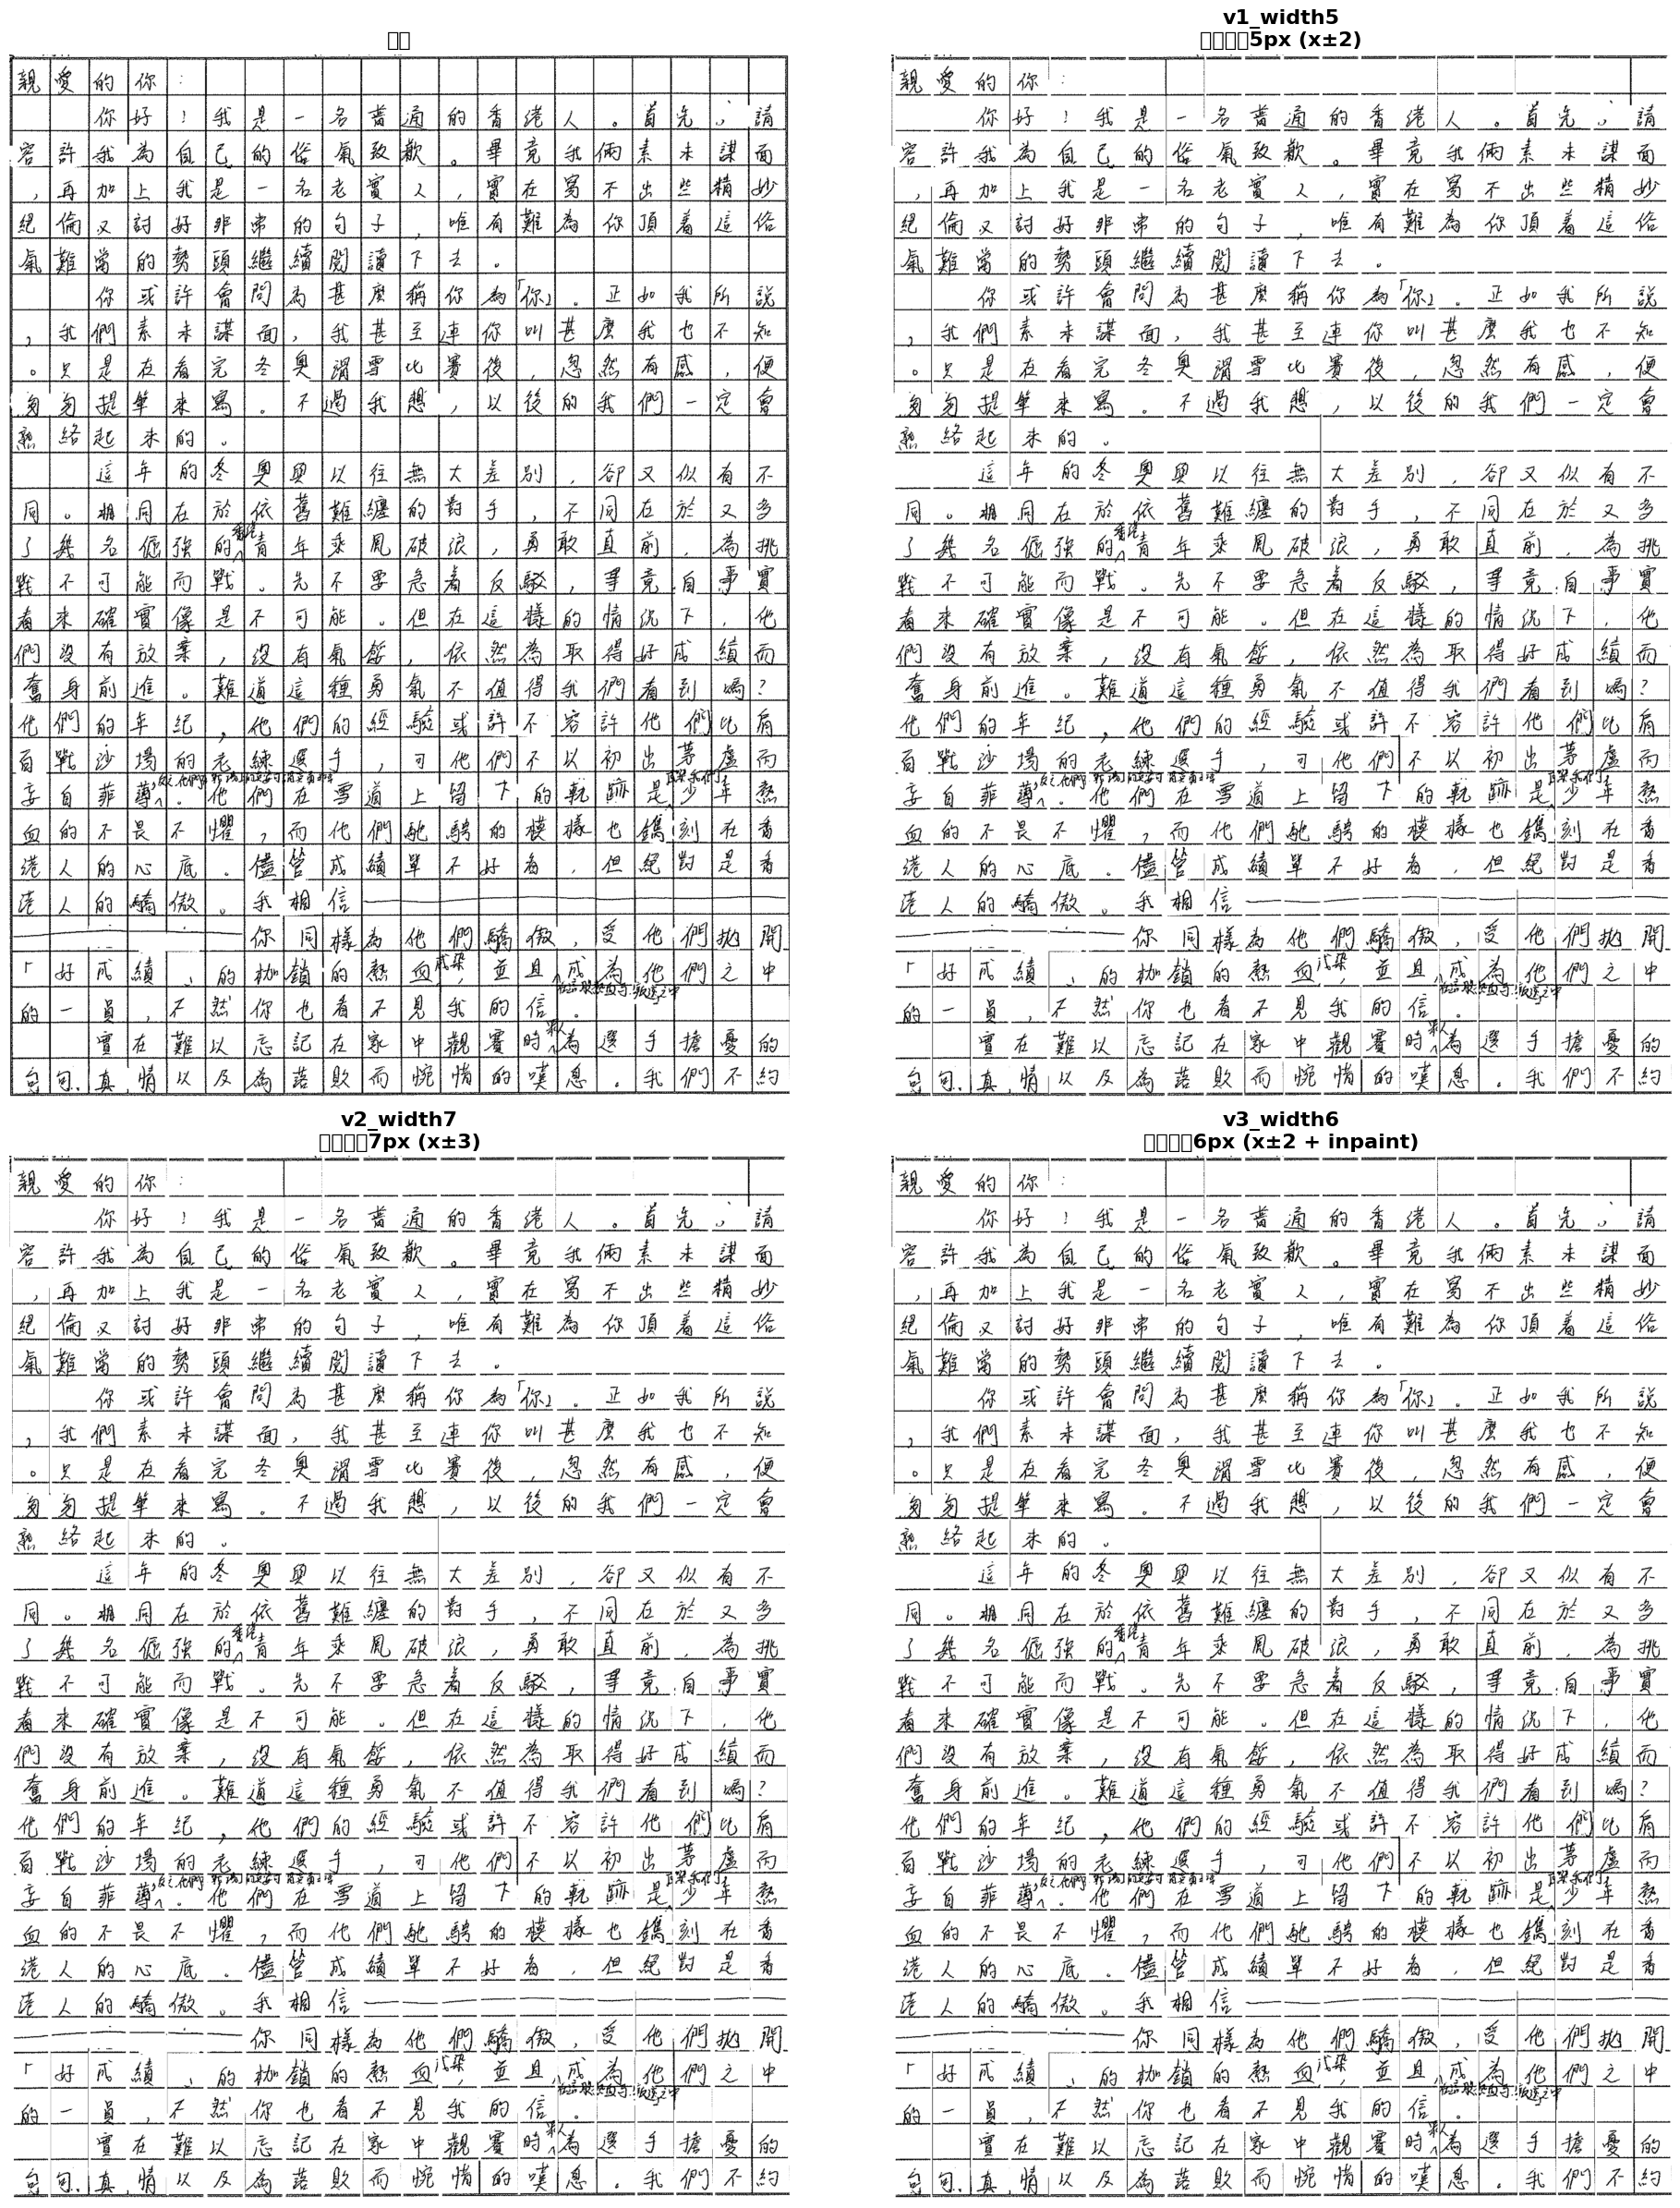


请仔细观察:
1. 竖线是否完全删除？
2. 文字笔画是否受损？
3. 哪个版本效果最好？


In [ ]:
# 可视化对比六张图片
fig = plt.figure(figsize=(24, 16))

# 使用GridSpec创建布局: 2行3列
from matplotlib.gridspec import GridSpec
gs = GridSpec(2, 3, figure=fig)

# 原图 - 第一行第一个
ax0 = fig.add_subplot(gs[0, 0])
ax0.imshow(img_rgb)
ax0.set_title('原图', fontsize=16, fontweight='bold')
ax0.axis('off')

# 五个处理版本 - 剩余5个位置
positions = [(0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
axes_list = [fig.add_subplot(gs[pos]) for pos in positions]

for ax, (version_name, version_data) in zip(axes_list, processed_images.items()):
    ax.imshow(version_data['rgb'])
    ax.set_title(f"{version_name}\n{version_data['desc']}", fontsize=13, fontweight='bold')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n请仔细观察:")
print("1. 竖线是否完全删除？")
print("2. 文字笔画是否受损？")
print("3. 哪个版本效果最好？")

In [18]:
def remove_vertical_lines_simple(image, vertical_lines, line_width_half=2):
    """
    简单删除竖线 - 直接涂白指定宽度
    
    参数:
        image: 输入图片
        vertical_lines: 竖线列表 [(x, y1, y2, angle), ...]
        line_width_half: 竖线宽度的一半（删除x±line_width_half）
    
    返回:
        处理后的图片
    """
    result = image.copy()
    
    for x, y1, y2, angle in vertical_lines:
        # 计算删除区域
        x_start = max(0, x - line_width_half)
        x_end = min(result.shape[1], x + line_width_half + 1)
        
        # 直接涂白
        result[y1:y2+1, x_start:x_end] = 255
    
    return result

# 测试五个版本
test_versions = [
    {'name': 'v1_width5', 'line_width_half': 2, 'desc': '删除宽度5px (x±2)'},
    {'name': 'v2_width7', 'line_width_half': 3, 'desc': '删除宽度7px (x±3)'},
    {'name': 'v3_width9', 'line_width_half': 4, 'desc': '删除宽度9px (x±4)'},
    {'name': 'v4_width7then5', 'line_width_half': [3, 2], 'desc': '两次删除: 7px→5px'},
    {'name': 'v4_width9then7', 'line_width_half': [4, 3], 'desc': '两次删除: 9px→7px'},
    {'name': 'v5_width6', 'line_width_half': 2, 'desc': '删除宽度6px (x±2 + inpaint)'},
]

processed_images = {}

print("="*80)
print("竖线删除测试")
print("="*80)

for version in test_versions:
    print(f"\n{version['name']}: {version['desc']}")
    
    if 'then' in version['name']:
        # 两次删除版本: 先7px，再5px
        widths = version['line_width_half']
        result_gray = remove_vertical_lines_simple(gray, vertical_lines, widths[0])
        result_gray = remove_vertical_lines_simple(result_gray, vertical_lines, widths[1])
    elif 'inpaint' not in version['name']:
        result_gray = remove_vertical_lines_simple(gray, vertical_lines, version['line_width_half'])
    else:
        # inpaint版本
        temp = remove_vertical_lines_simple(gray, vertical_lines, version['line_width_half'])
        # 创建mask for inpaint (稍微扩展1px)
        mask = np.zeros(gray.shape, dtype=np.uint8)
        for x, y1, y2, angle in vertical_lines:
            x_start = max(0, x - 3)  # 扩展到±3
            x_end = min(mask.shape[1], x + 4)
            mask[y1:y2+1, x_start:x_end] = 255
        result_gray = cv2.inpaint(temp, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)
    
    # 转换为RGB用于可视化
    result_rgb = cv2.cvtColor(result_gray, cv2.COLOR_GRAY2RGB)
    processed_images[version['name']] = {
        'gray': result_gray,
        'rgb': result_rgb,
        'desc': version['desc']
    }
    
    # 保存结果
    output_path = project_root / 'output' / f"temp_cropped_{version['name']}.png"
    cv2.imwrite(str(output_path), result_gray)





print("="*80)
print("删除完成!")
print("\n" + "="*80)    
print(f"  保存到: {output_path}")
print("="*80)

竖线删除测试

v1_width5: 删除宽度5px (x±2)

v2_width7: 删除宽度7px (x±3)

v3_width9: 删除宽度9px (x±4)

v4_width7then5: 两次删除: 7px→5px

v4_width9then7: 两次删除: 9px→7px

v5_width6: 删除宽度6px (x±2 + inpaint)
删除完成!

  保存到: c:\Users\Quenton\Documents\Github\writtingOCR\output\temp_cropped_v5_width6.png


## 9. 竖线删除测试

根据竖线宽度（5-7px，通常6px）测试五种删除方案